## Child Mind Institute - Analysis - LSTM

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data_dir = './child-mind-institute-problematic-internet-use'

train_data = data_dir+'/train.csv'
test_data = data_dir+'/test.csv'
data_dict = data_dir+'/data_dictionary.csv'

train_df = pd.read_csv(train_data)
test_df = pd.read_csv(test_data)
dict_df = pd.read_csv(data_dict)

In [3]:
print(f"Train Data Shape: {train_df.shape}")
print(f"Test Data Shape: {test_df.shape}")

Train Data Shape: (3960, 82)
Test Data Shape: (20, 59)


In [4]:
train_df = train_df.dropna(subset=['sii'])
train_df.shape

(2736, 82)

In [5]:
print(train_df.isna().sum())

id                                          0
Basic_Demos-Enroll_Season                   0
Basic_Demos-Age                             0
Basic_Demos-Sex                             0
CGAS-Season                               394
                                         ... 
SDS-SDS_Total_Raw                         209
SDS-SDS_Total_T                           211
PreInt_EduHx-Season                        17
PreInt_EduHx-computerinternet_hoursday     82
sii                                         0
Length: 82, dtype: int64


In [6]:
print(test_df.isna().sum())

id                                         0
Basic_Demos-Enroll_Season                  0
Basic_Demos-Age                            0
Basic_Demos-Sex                            0
CGAS-Season                               10
CGAS-CGAS_Score                           12
Physical-Season                            6
Physical-BMI                               7
Physical-Height                            7
Physical-Weight                            7
Physical-Waist_Circumference              15
Physical-Diastolic_BP                      9
Physical-HeartRate                         8
Physical-Systolic_BP                       9
Fitness_Endurance-Season                  16
Fitness_Endurance-Max_Stage               17
Fitness_Endurance-Time_Mins               17
Fitness_Endurance-Time_Sec                17
FGC-Season                                 3
FGC-FGC_CU                                 7
FGC-FGC_CU_Zone                            7
FGC-FGC_GSND                              15
FGC-FGC_GS

In [7]:
missing_test_columns=set(train_df.columns) - set(test_df.columns)

In [8]:
missing_test_columns

{'PCIAT-PCIAT_01',
 'PCIAT-PCIAT_02',
 'PCIAT-PCIAT_03',
 'PCIAT-PCIAT_04',
 'PCIAT-PCIAT_05',
 'PCIAT-PCIAT_06',
 'PCIAT-PCIAT_07',
 'PCIAT-PCIAT_08',
 'PCIAT-PCIAT_09',
 'PCIAT-PCIAT_10',
 'PCIAT-PCIAT_11',
 'PCIAT-PCIAT_12',
 'PCIAT-PCIAT_13',
 'PCIAT-PCIAT_14',
 'PCIAT-PCIAT_15',
 'PCIAT-PCIAT_16',
 'PCIAT-PCIAT_17',
 'PCIAT-PCIAT_18',
 'PCIAT-PCIAT_19',
 'PCIAT-PCIAT_20',
 'PCIAT-PCIAT_Total',
 'PCIAT-Season',
 'sii'}

In [9]:
missing_test_columns.remove('sii')

In [10]:
display(dict_df)

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
3,Demographics,Basic_Demos-Sex,Sex of participant,categorical int,"0,1","0=Male, 1=Female"
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
...,...,...,...,...,...,...
76,Sleep Disturbance Scale,SDS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
77,Sleep Disturbance Scale,SDS-SDS_Total_Raw,Total Raw Score,int,NaN,NaN
78,Sleep Disturbance Scale,SDS-SDS_Total_T,Total T-Score,int,NaN,NaN
79,Internet Use,PreInt_EduHx-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


In [11]:
train_df = train_df.dropna(subset=["sii"])

In [12]:
train_df["sii"].value_counts()

sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64

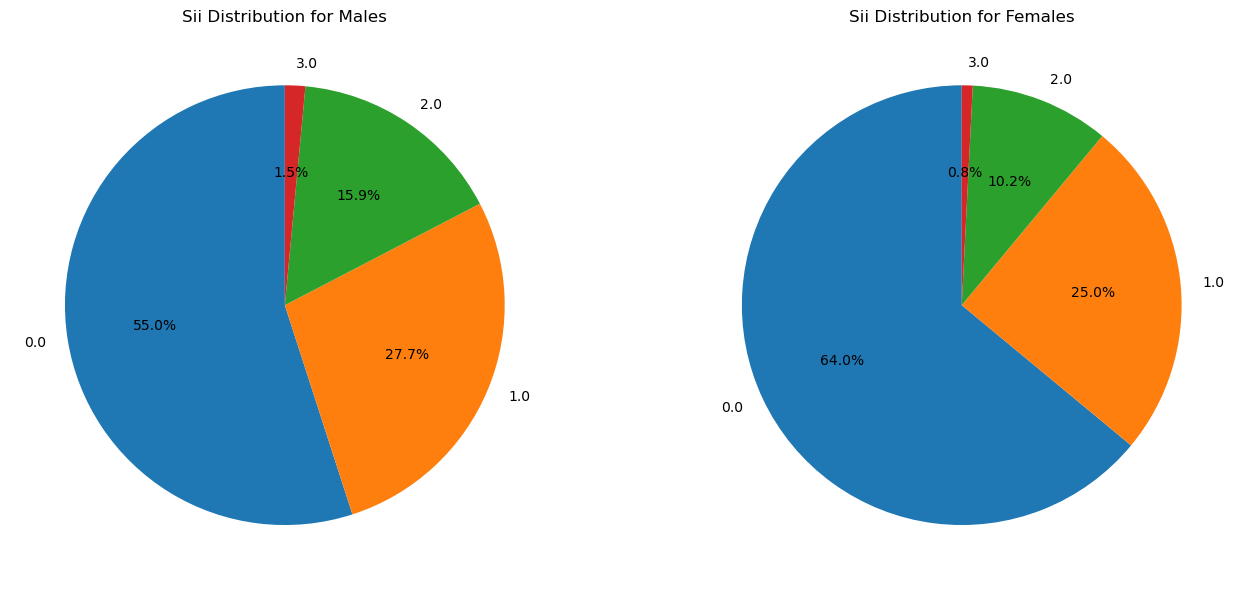

In [13]:
import matplotlib.pyplot as plt

male_data = train_df[train_df['Basic_Demos-Sex'] == 0]
female_data = train_df[train_df['Basic_Demos-Sex'] == 1]

male_si_counts = male_data['sii'].value_counts()
female_si_counts = female_data['sii'].value_counts()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(male_si_counts, labels=male_si_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sii Distribution for Males')

plt.subplot(1, 2, 2)
plt.pie(female_si_counts, labels=female_si_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sii Distribution for Females')

plt.tight_layout()
plt.show()

In [14]:
import pyarrow.parquet as pq

file_path = './child-mind-institute-problematic-internet-use/series_test.parquet/id=00115b9f/part-0.parquet'
parquet_sample_df = pq.read_table(file_path).to_pandas()
display(parquet_sample_df)

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT,id
0,0,0.021536,0.022214,-1.022370,0.022853,-88.280762,0.0,53.000000,4188.000000,56940000000000,4,3,41.0,00115b9f
1,1,0.022005,0.022187,-1.019740,0.020231,-88.241707,0.0,51.666668,4188.166504,56945000000000,4,3,41.0,00115b9f
2,2,0.022240,0.022005,-1.019401,0.019893,-88.170067,0.0,50.333332,4188.333496,56950000000000,4,3,41.0,00115b9f
3,3,0.021589,0.022578,-1.018177,0.018667,-88.250031,0.0,50.500000,4188.500000,56955000000000,4,3,41.0,00115b9f
4,4,0.022005,0.023763,-1.014323,0.016848,-88.130775,0.0,33.166668,4181.000000,57235000000000,4,3,41.0,00115b9f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43325,43325,-0.008333,-0.023620,-1.006901,0.007224,-88.595741,0.0,0.000000,3824.000000,57580000000000,6,3,85.0,00115b9f
43326,43326,0.048730,-0.076725,-0.953776,0.056839,-85.352219,0.0,0.000000,3824.000000,57640000000000,6,3,85.0,00115b9f
43327,43327,0.387370,0.793151,-0.402214,0.069961,-24.097908,0.0,0.000000,3824.000000,57645000000000,6,3,85.0,00115b9f
43328,43328,0.801953,0.501589,-0.040937,0.045489,-2.113776,0.0,0.000000,3824.000000,57650000000000,6,3,85.0,00115b9f


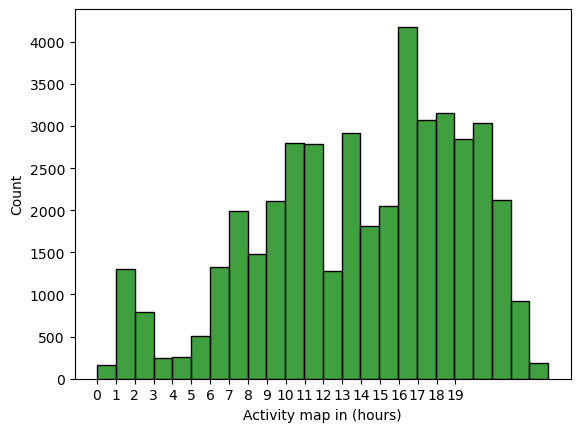

In [15]:
import seaborn as sns
parquet_sample_df['hours'] = parquet_sample_df['time_of_day'] / 3.6e12

ax = sns.histplot(x='hours', data=parquet_sample_df, bins=24, color='green')
ax.set_xlabel('Activity map in (hours)')
plt.xticks(range(20))

plt.show()

In [16]:
target_col = ['sii']

categorical_cols = ['Basic_Demos-Enroll_Season','CGAS-Season','Physical-Season',
                    'Fitness_Endurance-Season','FGC-Season','BIA-Season','PAQ_A-Season',
                    'PAQ_C-Season','PCIAT-Season','SDS-Season','PreInt_EduHx-Season']

categorical_int_cols = ['Basic_Demos-Sex','FGC-FGC_CU_Zone','FGC-FGC_GSND_Zone',	
                        'FGC-FGC_GSD_Zone','FGC-FGC_PU_Zone','FGC-FGC_SRL_Zone',	
                        'FGC-FGC_SRR_Zone',	'FGC-FGC_TL_Zone','BIA-BIA_Activity_Level_num',	
                        'BIA-BIA_Frame_num','PCIAT-PCIAT_01','PCIAT-PCIAT_02',
                        'PCIAT-PCIAT_03','PCIAT-PCIAT_04','PCIAT-PCIAT_05','PCIAT-PCIAT_06',
                        'PCIAT-PCIAT_07','PCIAT-PCIAT_08','PCIAT-PCIAT_09','PCIAT-PCIAT_10',
                        'PCIAT-PCIAT_11','PCIAT-PCIAT_12','PCIAT-PCIAT_13','PCIAT-PCIAT_14',
                        'PCIAT-PCIAT_15','PCIAT-PCIAT_16','PCIAT-PCIAT_17','PCIAT-PCIAT_18',
                        'PCIAT-PCIAT_19','PCIAT-PCIAT_20',
                        'PreInt_EduHx-computerinternet_hoursday']

numerical_cols = ['Basic_Demos-Age','CGAS-CGAS_Score','Physical-BMI','Physical-Height',
                  'Physical-Weight','Physical-Waist_Circumference','Physical-Diastolic_BP',
                  'Physical-HeartRate','Physical-Systolic_BP','Fitness_Endurance-Max_Stage',
                  'Fitness_Endurance-Time_Mins','Fitness_Endurance-Time_Sec','FGC-FGC_CU',
                  'FGC-FGC_GSND','FGC-FGC_GSD','FGC-FGC_PU','FGC-FGC_SRL','FGC-FGC_SRR',
                  'FGC-FGC_TL','BIA-BIA_BMC','BIA-BIA_BMI','BIA-BIA_BMR','BIA-BIA_DEE',
                  'BIA-BIA_ECW','BIA-BIA_FFM','BIA-BIA_FFMI','BIA-BIA_FMI','BIA-BIA_Fat',
                  'BIA-BIA_ICW','BIA-BIA_LDM','BIA-BIA_LST','BIA-BIA_SMM','BIA-BIA_TBW',
                  'PAQ_A-PAQ_A_Total','PAQ_C-PAQ_C_Total','PCIAT-PCIAT_Total',
                  'SDS-SDS_Total_Raw','SDS-SDS_Total_T']

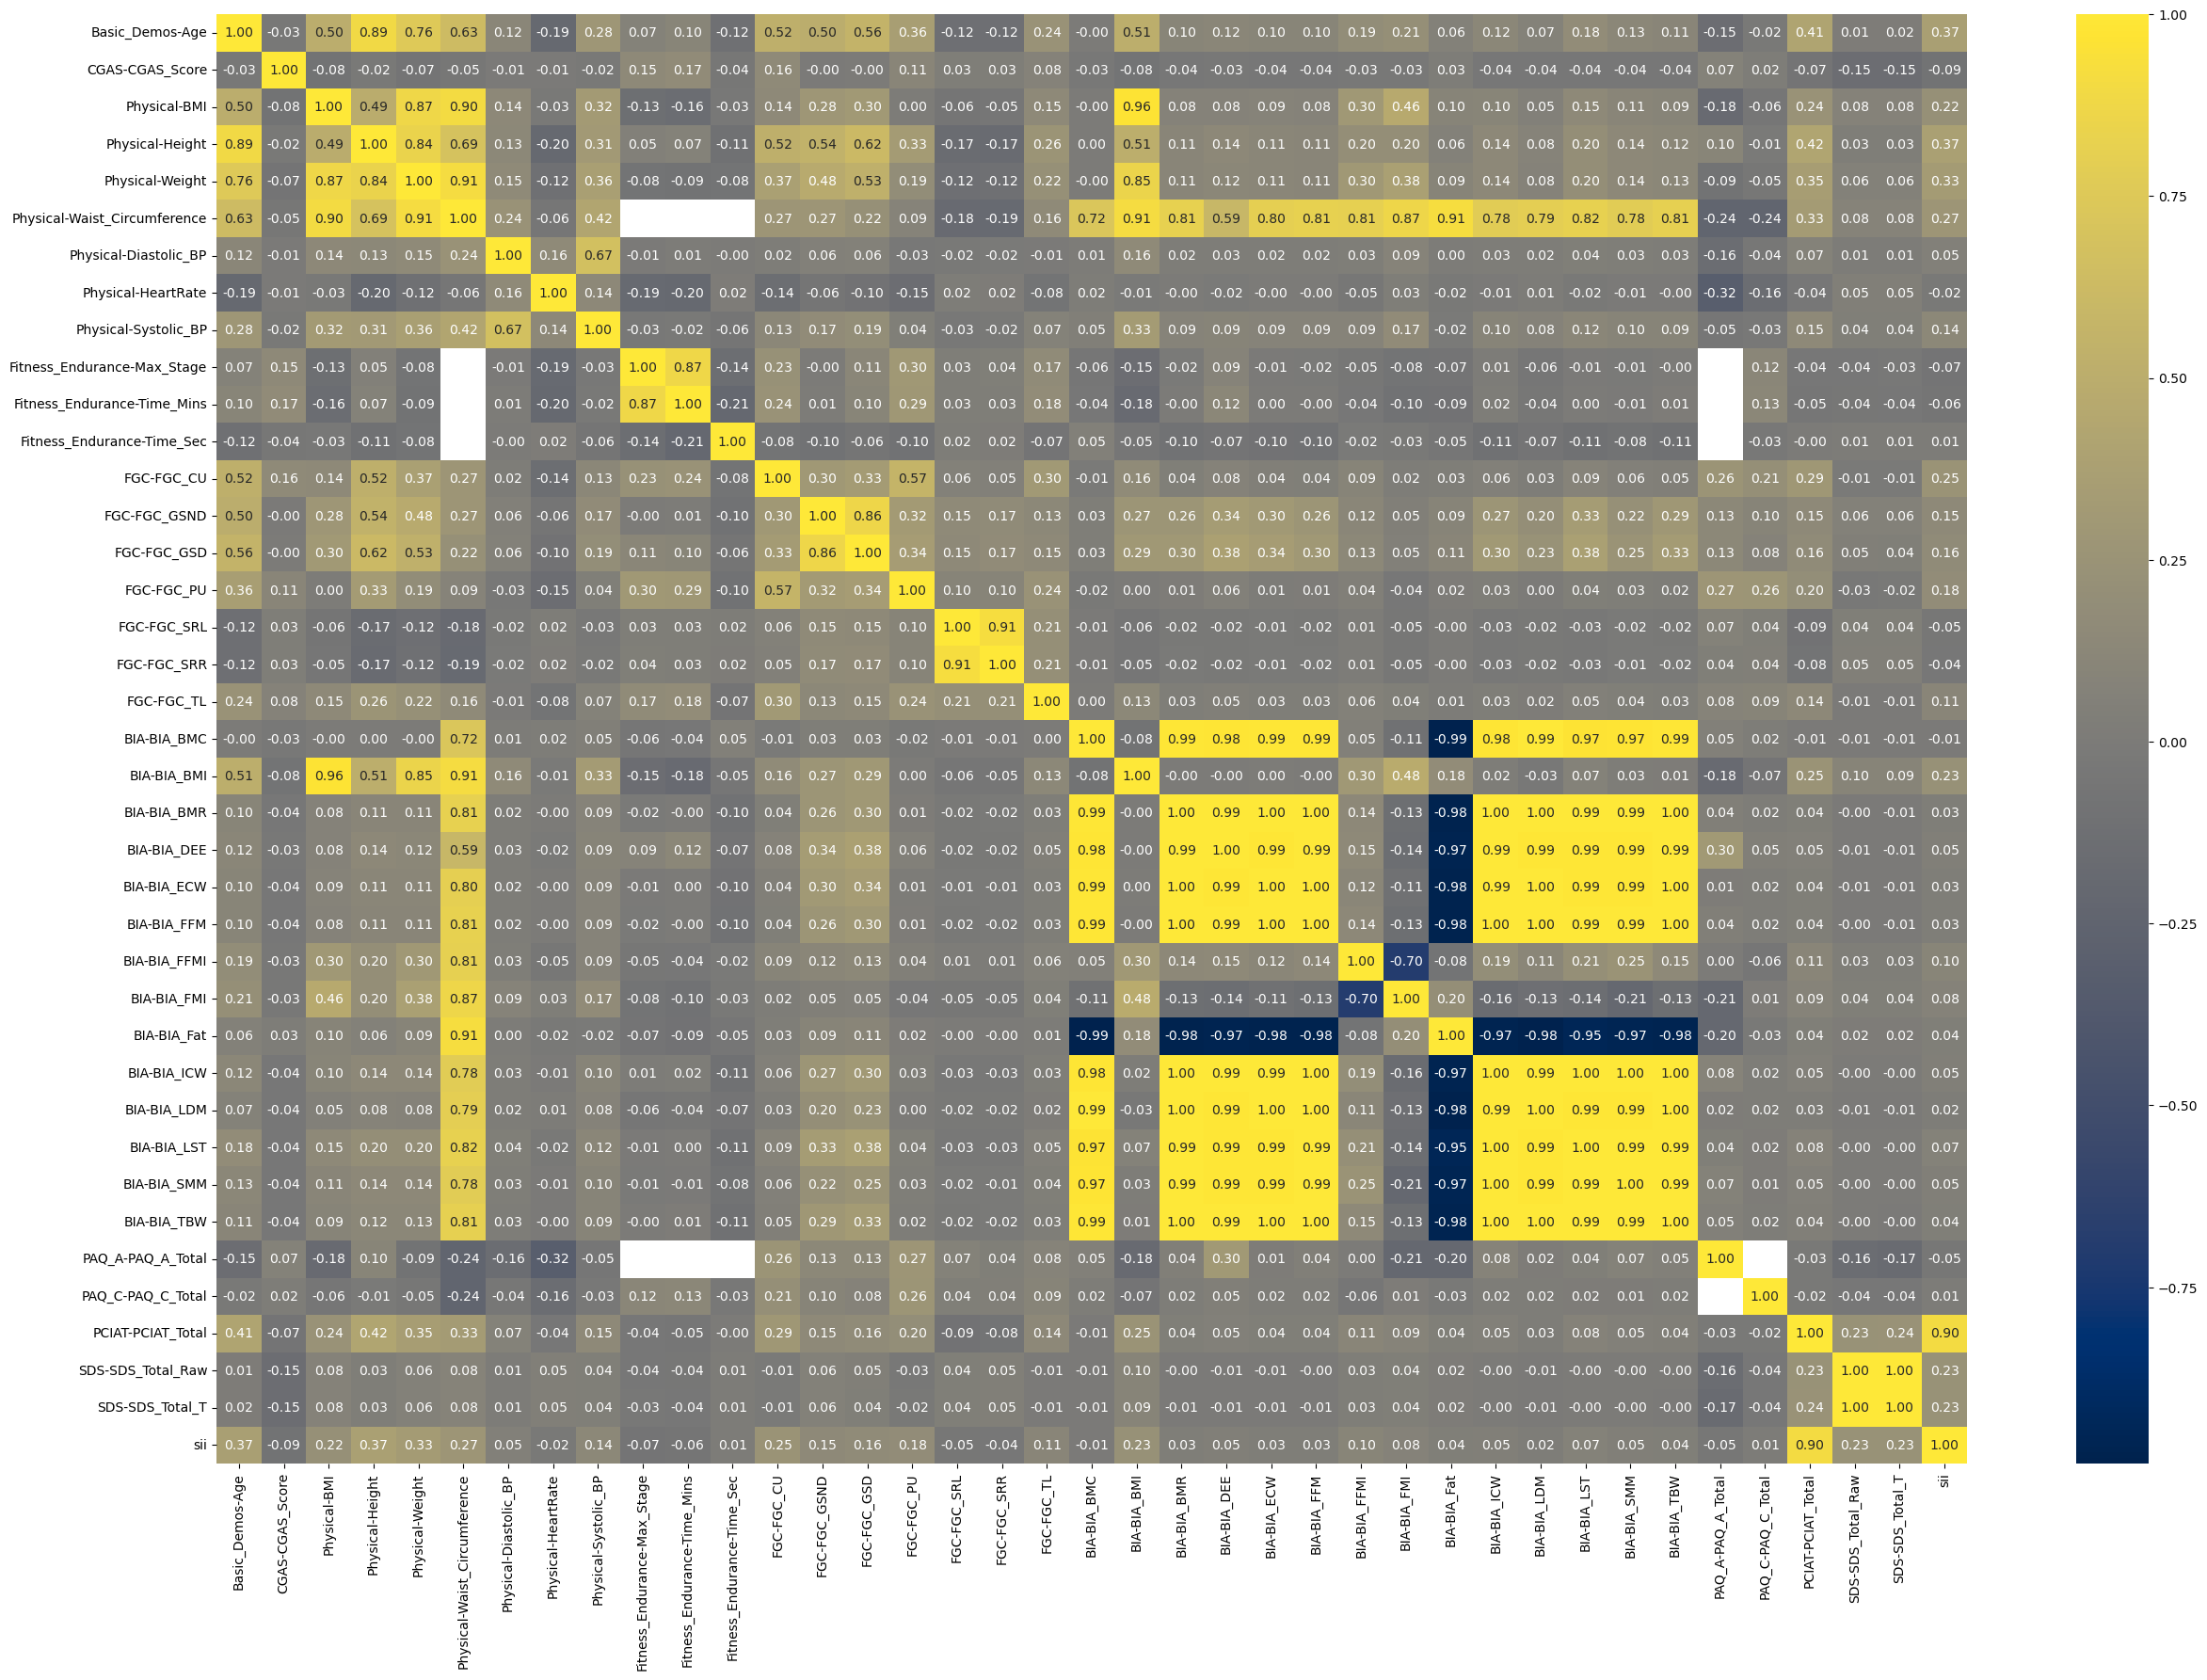

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = train_df[numerical_cols+target_col]

plt.figure(figsize=(30, 20))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap='cividis', cbar=True)

plt.show()


In [18]:
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

def process_parq_files(filename, dirname):
    df = pd.read_parquet(os.path.join(dirname, filename, 'part-0.parquet'))
    df.drop('step', axis=1, inplace=True)
    return df.describe().values.reshape(-1), filename.split('=')[1]

def load_parquets(dirname):
    ids = os.listdir(dirname)
    
    with ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(lambda fname: process_parq_files(fname, dirname), ids), total=len(ids)))
    
    stats, indexes = zip(*results)
    
    df = pd.DataFrame(stats, columns=[f"feature_{i}" for i in range(len(stats[0]))])
    df['id'] = indexes
    return df

In [19]:
train_parquet = load_parquets("./child-mind-institute-problematic-internet-use/series_train.parquet")
test_parquet = load_parquets("./child-mind-institute-problematic-internet-use/series_test.parquet")

100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 12.88it/s]


In [20]:
print(f'Train Parquet Shape: {train_parquet.shape}')
print(f'Test Parquet Shape: {test_parquet.shape}')

Train Parquet Shape: (996, 97)
Test Parquet Shape: (2, 97)


In [21]:
train_parquet.head(2)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,id
0,269335.0,269335.0,269335.0,269335.0,269335.0,269335.0,269335.0,269335.0,269335.0,269335.0,...,4.568309,89.673332,0.0,2659.666748,4179.0,8.639500e+13,7.0,1.0,63.0,0d01bbf2
1,412332.0,412332.0,412332.0,412332.0,412332.0,412332.0,412332.0,412332.0,412332.0,412332.0,...,3.006919,89.322289,1.0,2648.000000,4181.0,8.639500e+13,7.0,3.0,37.0,cefdb7fe


In [22]:
train_parquet_df = train_parquet.drop(columns=['id'])
test_parquet_df = test_parquet.drop(columns=['id'])

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def perform_pca(train_df, test_df, n_components):
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_df) 
    test_scaled = scaler.transform(test_df)
    
    pca = PCA(n_components=n_components)
    train_pca = pca.fit_transform(train_scaled) 
    test_pca = pca.transform(test_scaled) 

    df_train_pca = pd.DataFrame(train_pca, columns=[f'PC_{i + 1}' for i in range(train_pca.shape[1])])
    df_test_pca = pd.DataFrame(test_pca, columns=[f'PC_{i + 1}' for i in range(test_pca.shape[1])])
    
    return df_train_pca, df_test_pca

In [24]:
train_parquet_enc, test_parquet_enc = perform_pca(train_parquet_df, test_parquet_df, n_components=50)

print(train_parquet_enc.shape) 
print(test_parquet_enc.shape) 

(996, 50)
(2, 50)


In [25]:
parquet_columns=train_parquet_enc.columns.tolist()

In [26]:
train_parquet_enc['id']=train_parquet['id']
test_parquet_enc['id']=test_parquet['id']

In [27]:
print(train_parquet_enc.shape) 
print(test_parquet_enc.shape) 

(996, 51)
(2, 51)


In [28]:
train_parquet_enc.head(2)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,id
0,-3.229421,1.451857,-0.619332,-2.626518,-2.707163,-2.099943,1.925253,-1.629650,-0.926422,1.313114,...,0.053718,0.089657,-0.122654,0.103690,-0.016369,-0.043813,-0.238285,-0.170406,0.065142,0d01bbf2
1,3.433731,0.386593,-1.315769,-0.026978,-0.353340,0.543622,-0.835046,-0.165848,0.525997,-0.342181,...,0.172282,-0.111962,0.326395,-0.009735,-0.007136,0.225456,0.326685,0.024782,0.050304,cefdb7fe


In [29]:
train_df_merged = pd.merge(train_df, train_parquet_enc, how="left", on='id')
test_df_merged = pd.merge(test_df, test_parquet_enc, how="left", on='id')

In [30]:
print(train_df_merged.shape)
print(test_df_merged.shape)

(2736, 132)
(20, 109)


In [31]:
uncommon_train_columns = train_df_merged.columns.difference(test_df_merged.columns)
uncommon_train_columns

Index(['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04',
       'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08',
       'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12',
       'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16',
       'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20',
       'PCIAT-PCIAT_Total', 'PCIAT-Season', 'sii'],
      dtype='object')

In [32]:
uncommon_train_columns = uncommon_train_columns.tolist()

In [33]:
uncommon_train_columns.remove('sii')

In [34]:
train_df_merged = train_df_merged.drop(columns=uncommon_train_columns)

In [35]:
print(train_df_merged.shape)
print(test_df_merged.shape)

(2736, 110)
(20, 109)


In [36]:
import pandas as pd
import numpy as np

def generate_derived_columns(df):
    df['Age_BMI_Interaction'] = df['Basic_Demos-Age'] * df['Physical-BMI']
    df['HeartRate_BP_Interaction'] = df['Physical-HeartRate'] * (df['Physical-Systolic_BP'] + df['Physical-Diastolic_BP'])
    df['Physical_Health_Score'] = df[['Physical-BMI', 'Physical-Height', 'Physical-Weight']].mean(axis=1)
    df['Physical_BP_Score'] = df[['Physical-Systolic_BP', 'Physical-Diastolic_BP']].mean(axis=1)
    df['Fitness_CGAS_Score'] = df['Fitness_Endurance-Max_Stage'] + df['CGAS-CGAS_Score']
    bins = [0, 12, 18, 30, 50, 100]
    labels = ['Child', 'Teen', 'Young_Adult', 'Adult', 'Senior']
    df['Age_Category'] = pd.cut(df['Basic_Demos-Age'], bins=bins, labels=labels, right=False)
    df['BMI_to_Height_Ratio'] = df['Physical-BMI'] / df['Physical-Height'].replace(0, np.nan) 
    df['Fat_to_BMI_Ratio'] = df['BIA-BIA_Fat'] / df['Physical-BMI'].replace(0, np.nan)  
    df['Physical-BMI_zscore'] = (df['Physical-BMI'] - df['Physical-BMI'].mean()) / df['Physical-BMI'].std()
    df['Physical-Weight_zscore'] = (df['Physical-Weight'] - df['Physical-Weight'].mean()) / df['Physical-Weight'].std()
    df['Waist_to_Height_Ratio'] = df['Physical-Waist_Circumference'] / df['Physical-Height'].replace(0, np.nan)  
    df['BIA_BMI_Change'] = df['BIA-BIA_BMI'].diff().fillna(0) 
    df['BMI_Internet_Hours'] = df['Physical-BMI'] * df['PreInt_EduHx-computerinternet_hoursday']
    df['Muscle_to_Fat'] = df['BIA-BIA_SMM'] / df['BIA-BIA_FMI']
    df['Hydration_Status'] = df['BIA-BIA_TBW'] / df['Physical-Weight']
    df['Internet_Hours_Age'] = df['PreInt_EduHx-computerinternet_hoursday'] * df['Basic_Demos-Age']
    
    return df


In [37]:
train_df_merged = generate_derived_columns(train_df_merged)
test_df_merged = generate_derived_columns(test_df_merged)

In [38]:
print(train_df_merged.shape)
print(test_df_merged.shape)

(2736, 126)
(20, 125)


In [39]:
train_df_merged.head(10)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BMI_to_Height_Ratio,Fat_to_BMI_Ratio,Physical-BMI_zscore,Physical-Weight_zscore,Waist_to_Height_Ratio,BIA_BMI_Change,BMI_Internet_Hours,Muscle_to_Fat,Hydration_Status,Internet_Hours_Age
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,...,0.366898,0.545926,-0.457978,-0.854370,NaN,0.0000,50.631947,6.383063,0.643522,15.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,...,0.292408,0.282913,-1.036822,-0.965089,0.458333,-2.8421,0.000000,12.718037,0.588157,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,...,0.294667,NaN,-0.504546,-0.282323,NaN,0.0000,33.297392,NaN,NaN,20.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,...,0.326649,1.029081,-0.169743,-0.143925,NaN,0.0000,0.000000,6.274343,0.563684,0.0
4,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,...,0.374453,3.050792,0.642511,0.561907,NaN,11.8922,0.000000,2.621003,0.562625,0.0
5,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,...,0.357468,1.086072,0.108996,-0.074726,NaN,-10.5236,58.982281,5.278294,0.558169,30.0
6,00abe655,Fall,11,0,Summer,66.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,0.0
7,00ae59c9,Fall,13,0,NaN,NaN,Winter,21.079065,57.75,100.0,...,0.365005,1.220059,0.397897,0.280497,NaN,0.0000,21.079065,6.681213,0.560118,13.0
8,00c0cd71,Winter,7,0,Summer,51.0,Spring,29.315775,54.00,121.6,...,0.542885,NaN,2.075672,0.778731,NaN,0.0000,58.631550,NaN,NaN,14.0
9,00d56d4b,Spring,5,1,Summer,80.0,Spring,17.284504,44.00,47.6,...,0.392830,NaN,-0.375035,-0.928183,NaN,0.0000,0.000000,NaN,NaN,0.0


In [40]:
train_df_merged = train_df_merged.drop(columns=['id'])
test_df_ids = test_df_merged['id']
test_df_merged = test_df_merged.drop(columns=['id'])

In [41]:
train_df_merged.dtypes.value_counts()

float64     112
object       10
int64         2
category      1
Name: count, dtype: int64

In [42]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def preprocess_dataframe(
    df, 
    target_column=None, 
    id_column=None, 
    numeric_strategy='median', 
    categorical_strategy='most_frequent'
):
    df_copy = df.copy()
    
    def is_continuous_numeric(series):
        unique_vals = series.unique()
        return (len(unique_vals) > 2 or 
                not all(val in {0, 1} for val in unique_vals))
    
    all_numeric_columns = df_copy.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df_copy.select_dtypes(include=['object', 'category']).columns.tolist()
    
    continuous_numeric_columns = [
        col for col in all_numeric_columns 
        if is_continuous_numeric(df_copy[col])
    ]
    binary_numeric_columns = [
        col for col in all_numeric_columns 
        if col not in continuous_numeric_columns
    ]
    
    if target_column and target_column in all_numeric_columns:
        if target_column in continuous_numeric_columns:
            continuous_numeric_columns.remove(target_column)
        else:
            binary_numeric_columns.remove(target_column)
    if id_column and id_column in categorical_columns:
        categorical_columns.remove(id_column)
    
    continuous_numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy=numeric_strategy)),
        ('scaler', StandardScaler())
    ])
    
    binary_numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy=numeric_strategy))
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy=categorical_strategy)),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('cont_num', continuous_numeric_transformer, continuous_numeric_columns),
            ('bin_num', binary_numeric_transformer, binary_numeric_columns),
            ('cat', categorical_transformer, categorical_columns)
        ])
    
    columns_to_transform = continuous_numeric_columns + binary_numeric_columns + categorical_columns
    X = df_copy[columns_to_transform]
    
    X_transformed = preprocessor.fit_transform(X)
    
    continuous_numeric_feature_names = continuous_numeric_columns
    binary_numeric_feature_names = binary_numeric_columns
    categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_columns)
    
    transformed_feature_names = (
        continuous_numeric_feature_names + 
        binary_numeric_feature_names + 
        list(categorical_feature_names)
    )
    
    transformed_df = pd.DataFrame(
        X_transformed, 
        columns=transformed_feature_names, 
        index=df_copy.index
    )
    
    if target_column and target_column in df_copy.columns:
        transformed_df[target_column] = df_copy[target_column]
    if id_column and id_column in df_copy.columns:
        transformed_df[id_column] = df_copy[id_column]
    
    return transformed_df, preprocessor

In [43]:
train_df_merged, preprocessor = preprocess_dataframe(
    train_df_merged, 
    target_column='sii', 
    id_column='id'
)

In [44]:
train_df_merged.shape

(2736, 157)

In [45]:
train_df_merged.head(10)

,Basic_Demos-Age,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Max_Stage,...,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter,Age_Category_Child,Age_Category_Teen,Age_Category_Young_Adult,sii
0,-1.528487,-1.293897,-0.454247,-1.381785,-0.862196,-0.049987,-0.121050,-0.057003,-0.172618,-0.000351,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,-0.361407,-0.012478,-1.055049,-1.100634,-0.976149,-1.861450,0.412028,-0.895089,0.314837,-0.000351,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.069637,0.536701,-0.502582,0.094254,-0.273438,-0.049987,-0.349512,0.933462,0.010178,-0.000351,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.361407,0.536701,-0.155079,0.023967,-0.130997,-0.049987,-0.730283,1.162031,0.010178,0.959609,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.805674,-1.385427,0.687986,0.515980,0.595455,-0.049987,-0.730283,-0.666520,-0.903800,-0.000351,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,-0.069637,-0.012478,0.134233,-0.116609,-0.059776,-0.049987,4.067421,0.095376,2.813041,-0.000351,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.222133,0.079052,-0.255152,-0.116609,-0.268690,-0.049987,-0.121050,-0.057003,-0.172618,-0.000351,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.805674,-0.012478,0.434093,0.269973,0.305824,-0.049987,-0.501821,-0.209382,2.020928,-0.000351,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,-0.944947,-1.293897,2.175510,-0.257184,0.818613,-0.049987,0.792798,-0.514141,-1.086595,-0.960311,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0
9,-1.528487,1.360471,-0.368159,-1.662935,-0.938165,-0.049987,-0.654129,-0.437951,-0.477277,-0.000351,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
test_df_merged, preprocessor = preprocess_dataframe(
    test_df_merged, 
    target_column='sii', 
    id_column='id'
)

In [47]:
test_df_merged.shape

(20, 151)

In [48]:
uncommon_train_columns_new = train_df_merged.columns.difference(test_df_merged.columns)
uncommon_train_columns_new

Index(['BIA-Season_Spring', 'Fitness_Endurance-Season_Winter',
       'PAQ_A-Season_Fall', 'PAQ_A-Season_Spring', 'PAQ_A-Season_Winter',
       'sii'],
      dtype='object')

In [49]:
uncommon_train_columns_new = uncommon_train_columns_new.tolist()
uncommon_train_columns_new.remove('sii')

In [50]:
train_df_merged = train_df_merged.drop(columns=uncommon_train_columns_new)

In [51]:
print(train_df_merged.shape)
print(test_df_merged.shape)

(2736, 152)
(20, 151)


In [52]:
def na_sums(df):
    na_sums = df.isna().sum()
    columns_with_na = na_sums[na_sums > 0]
    print(columns_with_na)

na_sums(train_df_merged)
na_sums(test_df_merged)

Series([], dtype: int64)
Series([], dtype: int64)


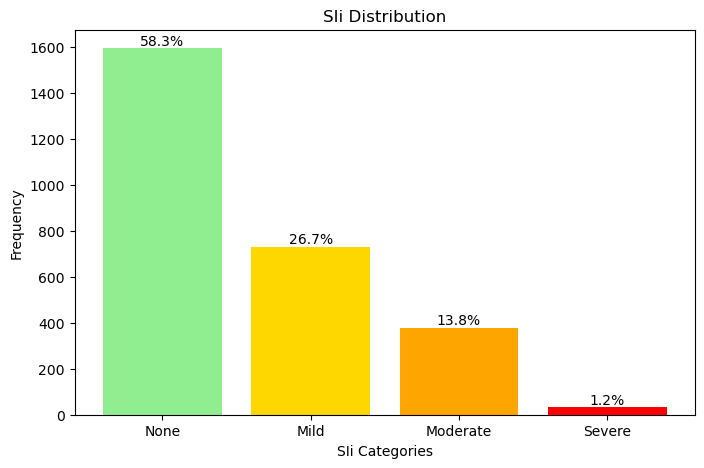

In [53]:
sii_levels = {"0":"None","1":"Mild","2":"Moderate","3":"Severe"}
sii_counts = train_df_merged['sii'].value_counts()
sii_labels = [sii_levels[str(int(x))] for x in sii_counts.index]

plt.figure(figsize=(8, 5))
colors = ['lightgreen', 'gold', 'orange', 'red']
bars = plt.bar(sii_labels, sii_counts.values, color=colors)

plt.xlabel('SIi Categories')
plt.ylabel('Frequency')
plt.title('SIi Distribution')

total = sii_counts.sum()
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{percentage:.1f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [54]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [55]:
heatmap_features = ["Physical-BMI",
"Physical-Height",
"Physical-Weight",
"Physical-Waist_Circumference",
"Physical-Diastolic_BP",
"Physical-HeartRate",
"Physical-Systolic_BP","Basic_Demos-Age","Basic_Demos-Sex",'sii']

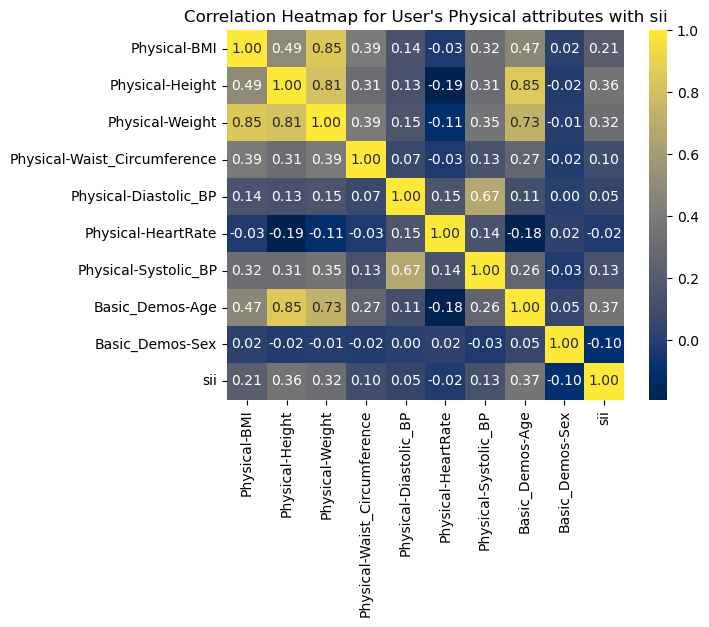

In [56]:
import seaborn as sns
corr_matrix = train_df_merged[heatmap_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt='.2f')
plt.title("Correlation Heatmap for User's Physical attributes with sii")
plt.show()

In [57]:
metrics_except_age_sii = ["Physical-BMI",
                          "Physical-Height",
                          "Physical-Weight",
                          "Physical-Waist_Circumference",
                          "Physical-Diastolic_BP",
                          "Physical-HeartRate",
                          "Physical-Systolic_BP",
                          "Basic_Demos-Sex"]

metrics_except_age_sex = ["Physical-BMI",
                          "Physical-Height",
                          "Physical-Weight",
                          "Physical-Waist_Circumference",
                          "Physical-Diastolic_BP",
                          "Physical-HeartRate",
                          "Physical-Systolic_BP",
                          "sii"]

def create_violin_plots(data, metrics, hue, x, n_cols=2):
    n_rows = (len(metrics) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()
    
    for i, metric in enumerate(metrics):
        sns.violinplot(data=data, x=x, y=metric, hue=hue, ax=axes[i], split=True)
        axes[i].set_title(f'{metric} vs {x}')
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

def create_box_plots(data, metrics, x, n_cols=2):
    n_rows = (len(metrics) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()
    
    for i, metric in enumerate(metrics):
        sns.boxplot(data=data, x=x, y=metric, ax=axes[i])
        axes[i].set_title(f'{metric} vs {x}')
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

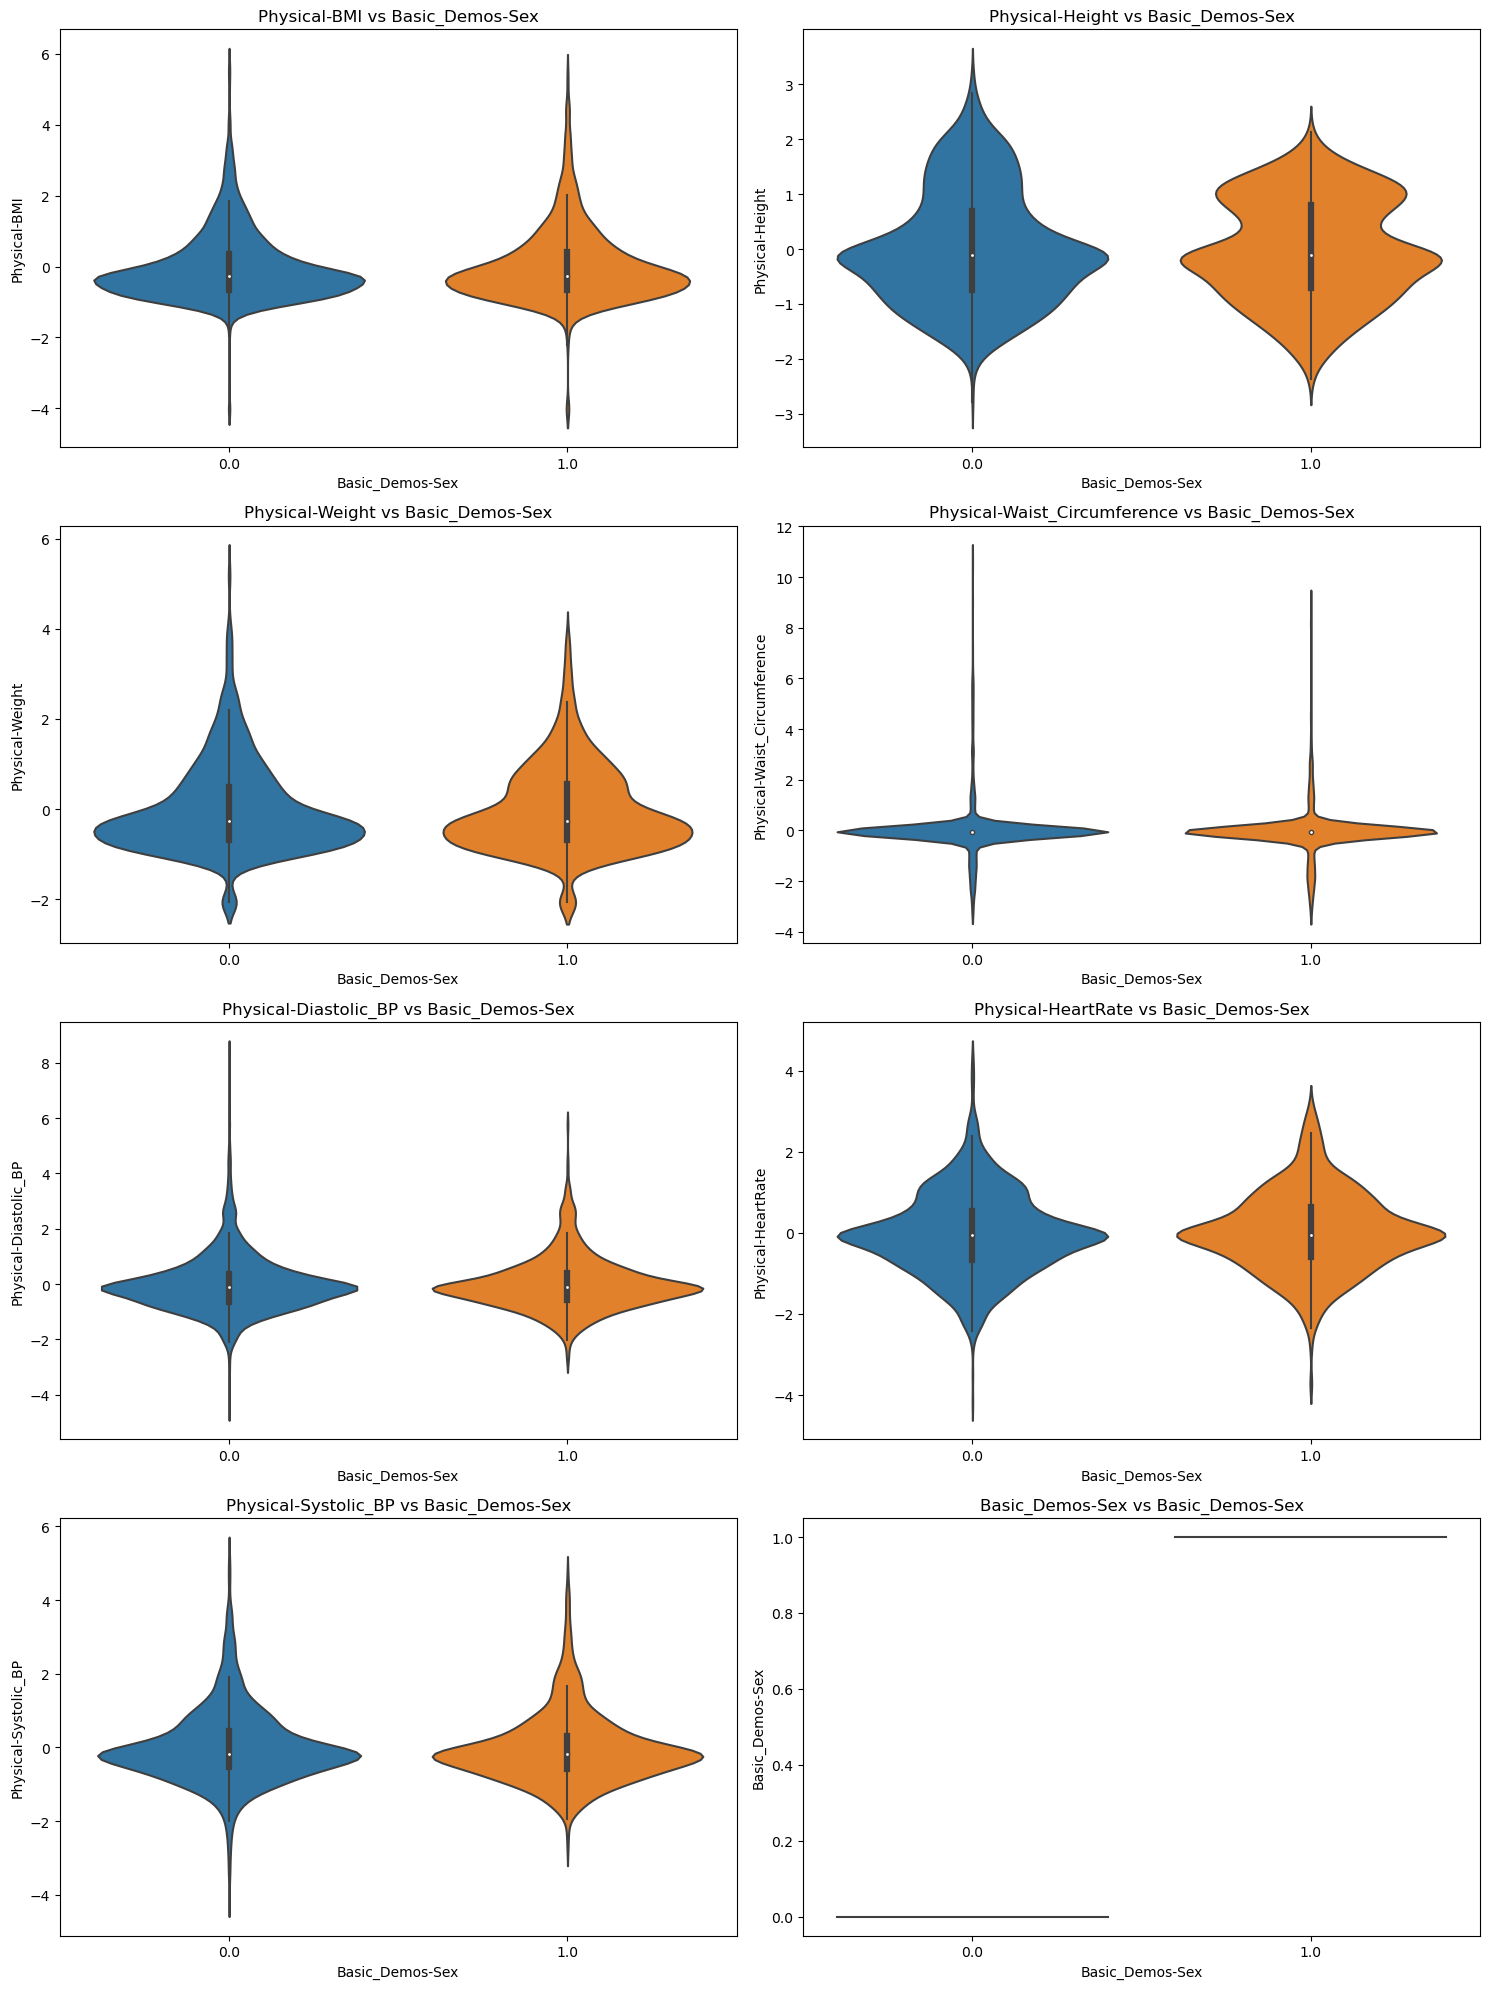

In [58]:
create_violin_plots(train_df_merged, metrics_except_age_sii, hue=None, x='Basic_Demos-Sex')

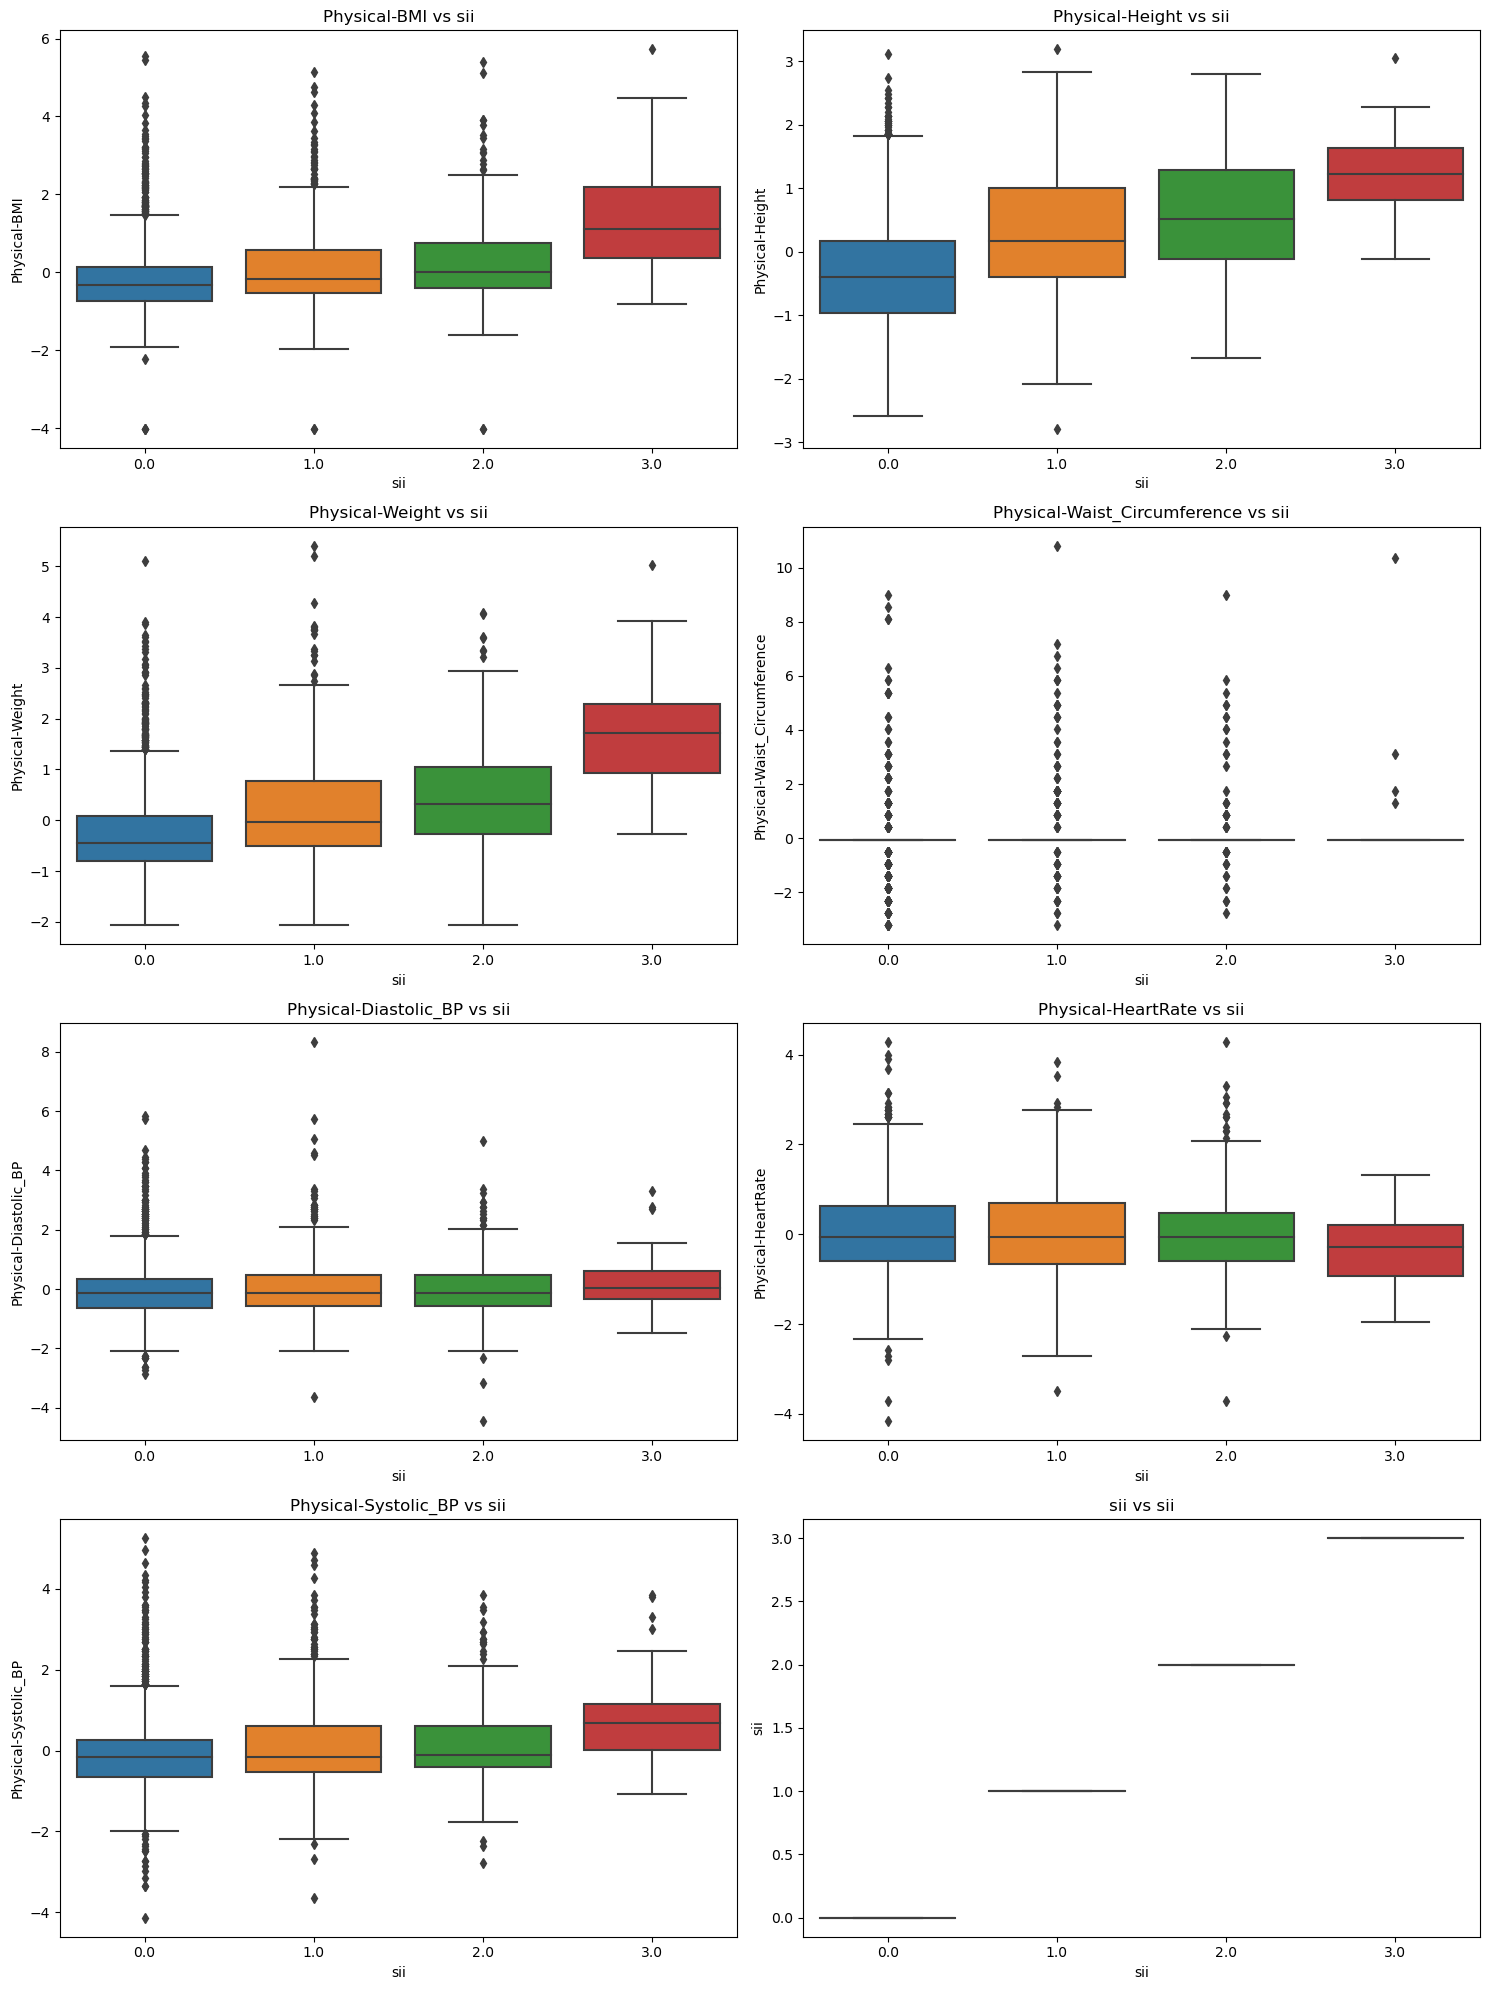

In [59]:
create_box_plots(train_df_merged, metrics_except_age_sex, x='sii')

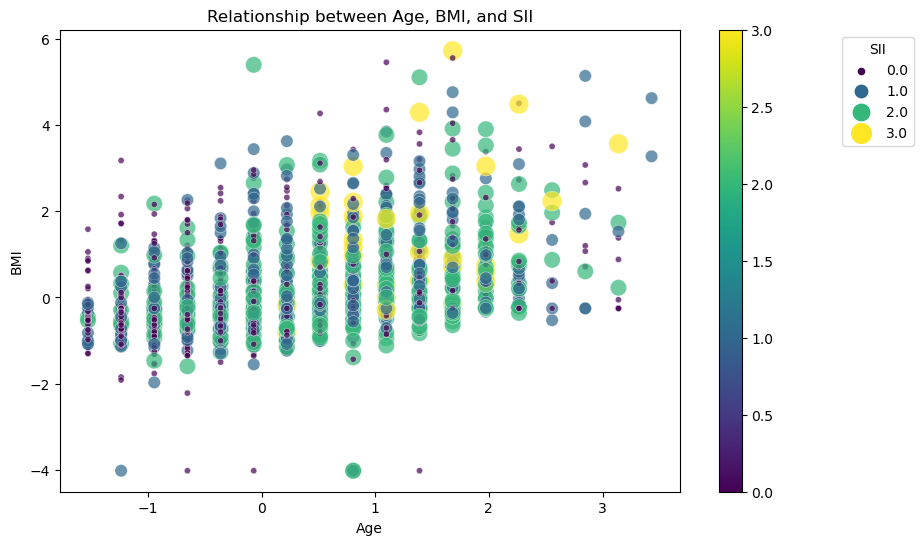

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=train_df_merged, x='Basic_Demos-Age', y='Physical-BMI', hue='sii', palette='viridis', size='sii', sizes=(20, 200), alpha=0.7)

norm = plt.Normalize(train_df_merged['sii'].min(), train_df_merged['sii'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
scatter.figure.colorbar(sm)

plt.title('Relationship between Age, BMI, and SII')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='SII', bbox_to_anchor=(1.25, 1), loc='upper left')

plt.show()

In [61]:
import pickle
train_df_merged.to_pickle("train_df_merged.pkl")
test_df_merged.to_pickle("test_df_merged.pkl")

### Load the saved pickle files for final modelling

In [1]:
import pandas as pd
train_df_merged = pd.read_pickle("train_df_merged.pkl")
test_df_merged = pd.read_pickle("test_df_merged.pkl")

In [2]:
print(train_df_merged.shape)
print(test_df_merged.shape)

(2736, 152)
(20, 151)


In [3]:
X_train_data = train_df_merged.drop(columns=['sii'])
y_train_data = train_df_merged['sii']
X_test_data = test_df_merged

In [4]:
print(f'Shape of Final Train Data: {X_train_data.shape}')
print(f'Shape of Final Test Data: {X_test_data.shape}')

Shape of Final Train Data: (2736, 151)
Shape of Final Test Data: (20, 151)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_data, 
                                                  y_train_data, 
                                                  test_size=0.2, 
                                                  random_state=42,
                                                  stratify=y_train_data)

In [6]:
train_df_merged['sii'].value_counts()

sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64

In [7]:
import sklearn
import imblearn
print(sklearn.__version__)
print(imblearn.__version__)

1.5.2
0.12.4


In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(pd.Series(y_resampled).value_counts())

sii
0.0    1275
2.0    1275
1.0    1275
3.0    1275
Name: count, dtype: int64


In [9]:
X_resampled, y_resampled = X_train, y_train

In [10]:
import torch 
import torch.nn as nn

X_test = torch.tensor(X_test_data.to_numpy(), dtype=torch.float32)

X_test = X_test.unsqueeze(1)

test_dataset = torch.utils.data.TensorDataset(X_test)

batch_size = 32
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

In [11]:
X_resampled = torch.tensor(X_resampled.to_numpy(), dtype=torch.float32)
y_resampled = torch.tensor(y_resampled.to_numpy(), dtype=torch.long)
X_val = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
y_val = torch.tensor(y_val.to_numpy(), dtype=torch.long)

X_resampled = X_resampled.unsqueeze(1) 
X_val = X_val.unsqueeze(1)

train_dataset = torch.utils.data.TensorDataset(X_resampled, y_resampled)
val_dataset = torch.utils.data.TensorDataset(X_val, y_val)

batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

class LSTM_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
        super(LSTM_Model, self).__init__()
        
        self.lstm = nn.LSTM(input_size=input_size, 
                            hidden_size=hidden_size, 
                            num_layers=num_layers, 
                            batch_first=True, 
                            dropout=dropout)
        
        self.fc = nn.Linear(hidden_size, output_size)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        out, (hn, cn) = self.lstm(x)
        
        out = out[:, -1, :]
        
        out = self.dropout(out)
        
        out = self.fc(out)
        
        return out

In [13]:
input_size = X_train.shape[1] 
hidden_size = 128   
num_layers = 2      
output_size = len(torch.unique(y_resampled))   
dropout = 0.2      

model = LSTM_Model(input_size=input_size, 
                   hidden_size=hidden_size, 
                   num_layers=num_layers, 
                   output_size=output_size, 
                   dropout=dropout)

print(model)

LSTM_Model(
  (lstm): LSTM(151, 128, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=128, out_features=4, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [14]:
from sklearn.metrics import cohen_kappa_score, mean_squared_error

def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

def evaluate_predictions(thresholds, y_true, oof_non_rounded):
    rounded_p = threshold_Rounder(oof_non_rounded, thresholds)
    return -quadratic_weighted_kappa(y_true, rounded_p)

In [15]:
import numpy as np

train_qwk = []
val_qwk = []
training_accuracy = []
validation_accuracy = []
training_loss = []
validation_loss = []

criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

num_epochs = 100  
patience = 10  
best_val_loss = float('inf')
epochs_without_improvement = 0

for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, targets in train_loader:
        optimizer.zero_grad() 

        outputs = model(inputs.float())
        
        loss = criterion(outputs, targets)
        loss.backward() 
        optimizer.step() 

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1) 
        total_train += targets.size(0)
        correct_train += (predicted == targets).sum().item()

    train_accuracy = 100 * correct_train / total_train
    training_accuracy.append(train_accuracy)
    avg_train_loss = running_loss / len(train_loader)
    training_loss.append(avg_train_loss)

    train_targets_np = targets.cpu().numpy()
    train_predicted_np = predicted.cpu().numpy()
    train_kappa = quadratic_weighted_kappa(train_targets_np, train_predicted_np)
    train_qwk.append(train_kappa)

    model.eval() 
    correct_val = 0
    total_val = 0
    running_val_loss = 0.0

    with torch.no_grad(): 
        for inputs, targets in val_loader:
            outputs = model(inputs.float())

            loss = criterion(outputs, targets)
            running_val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_val += targets.size(0)
            correct_val += (predicted == targets).sum().item()

    val_accuracy = 100 * correct_val / total_val
    validation_accuracy.append(val_accuracy)
    avg_val_loss = running_val_loss / len(val_loader)
    validation_loss.append(avg_val_loss)

    val_targets_np = targets.cpu().numpy()
    val_predicted_np = predicted.cpu().numpy()
    val_kappa = quadratic_weighted_kappa(val_targets_np, val_predicted_np)
    val_qwk.append(val_kappa)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Train QWK: {train_kappa}, "
          f"Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%, Validation QWK: {val_kappa}")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs")
            break

Epoch [1/100], Train Loss: 1.4141, Train Accuracy: 1.51%, Train QWK: 0.0, Validation Loss: 1.4034, Validation Accuracy: 1.64%, Validation QWK: 0.0
Epoch [2/100], Train Loss: 1.3924, Train Accuracy: 12.80%, Train QWK: 0.22047244094488194, Validation Loss: 1.3794, Validation Accuracy: 40.15%, Validation QWK: 0.18581907090464544
Epoch [3/100], Train Loss: 1.3625, Train Accuracy: 50.27%, Train QWK: 0.5875, Validation Loss: 1.3419, Validation Accuracy: 55.66%, Validation QWK: 0.2923387096774194
Epoch [4/100], Train Loss: 1.3119, Train Accuracy: 56.54%, Train QWK: 0.0, Validation Loss: 1.2758, Validation Accuracy: 58.03%, Validation QWK: 0.33684210526315783
Epoch [5/100], Train Loss: 1.2224, Train Accuracy: 57.04%, Train QWK: 0.55, Validation Loss: 1.1662, Validation Accuracy: 57.66%, Validation QWK: 0.33684210526315783
Epoch [6/100], Train Loss: 1.1105, Train Accuracy: 57.59%, Train QWK: 0.0, Validation Loss: 1.0480, Validation Accuracy: 57.66%, Validation QWK: 0.38186813186813195
Epoch [7/

In [16]:
print(f"Mean Train QWK --> {np.mean(train_qwk):.4f}")
print(f"Mean Validation QWK ---> {np.mean(val_qwk):.4f}")

Mean Train QWK --> 0.2916
Mean Validation QWK ---> 0.3183


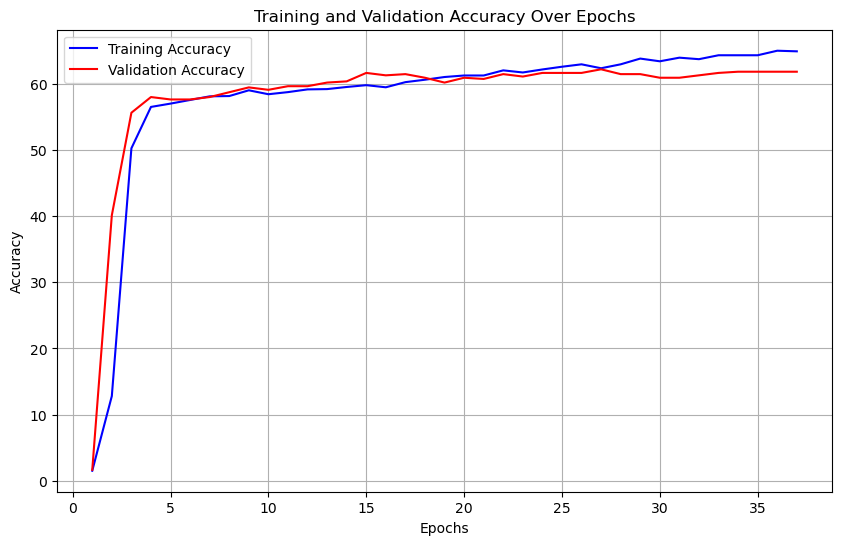

In [19]:
import matplotlib.pyplot as plt

train_accuracy = training_accuracy
val_accuracy = validation_accuracy

assert len(train_accuracy) == len(val_accuracy), "Train and validation accuracy lists must have the same length"

epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


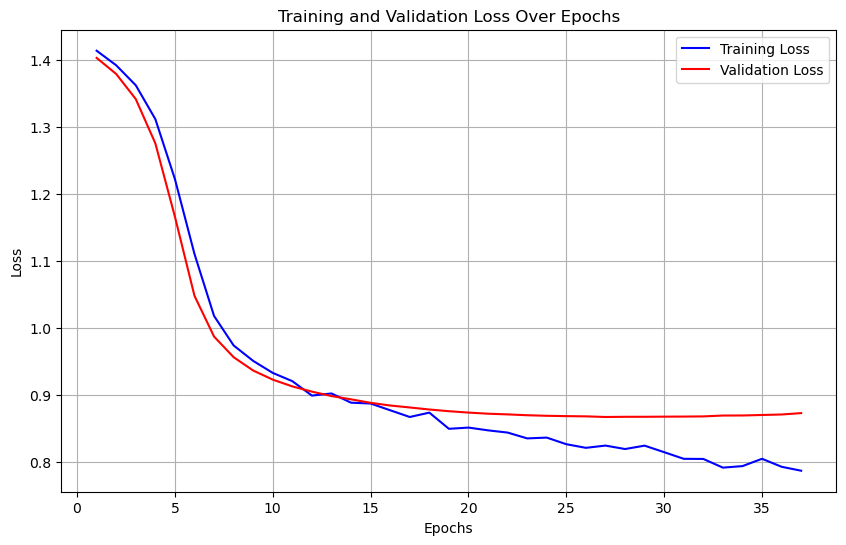

In [20]:
import matplotlib.pyplot as plt

train_loss = training_loss
val_loss = validation_loss

assert len(train_loss) == len(val_loss), "Train and validation Loss lists must have the same length"

epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

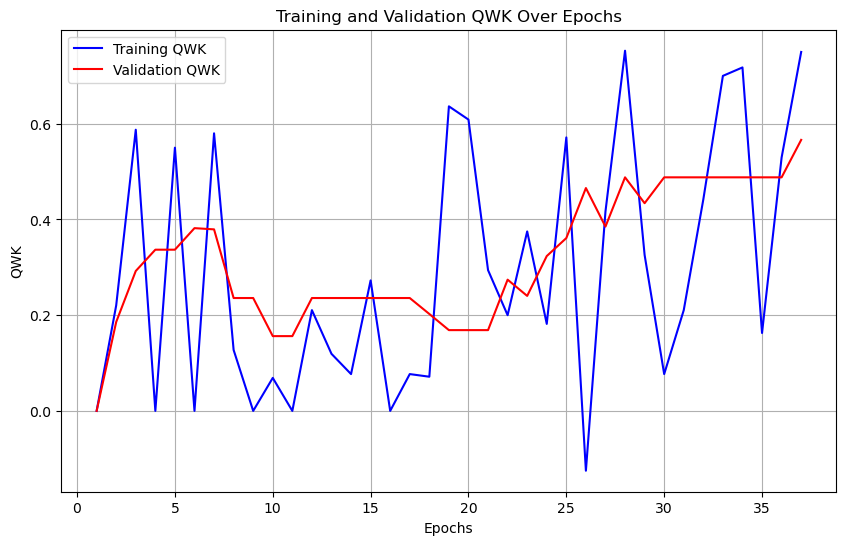

In [21]:
import matplotlib.pyplot as plt

assert len(train_qwk) == len(val_qwk), "Train and validation QWK lists must have the same length"

epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_qwk, 'b-', label='Training QWK')
plt.plot(epochs, val_qwk, 'r-', label='Validation QWK')
plt.title('Training and Validation QWK Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('QWK')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_df_final['sii'] = test_preds

In [ ]:
test_preds

[0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1]

In [38]:
test_df_submission = pd.read_csv("./child-mind-institute-problematic-internet-use/test.csv")

In [40]:
test_df_final = test_df_submission[['id']]

In [43]:
test_df_final

,id,sii
0,00008ff9,0
1,000fd460,0
2,00105258,1
3,00115b9f,1
4,0016bb22,0
5,001f3379,1
6,0038ba98,0
7,0068a485,0
8,0069fbed,2
9,0083e397,0


In [44]:
test_df_final.to_csv('submission.csv')

#### Final Submission on Kaggle was based on the IPYNB code. The code resulted in 0.31 on Kaggle with their hidden dataset.